In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.hbos import HBOS

normal_path = "features/S01/1/Normal/c_data"
relay_path  = "features/S01/1/Relay/c_data"

with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49997, n_norm))
    dataset_relay  = np.zeros((49998, n_relay))

    for i in range(49997):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49998):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

n bins 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2497
       Relay       0.94      0.13      0.23      2498

    accuracy                           0.56      4995
   macro avg       0.74      0.56      0.46      4995
weighted avg       0.74      0.56      0.46      4995



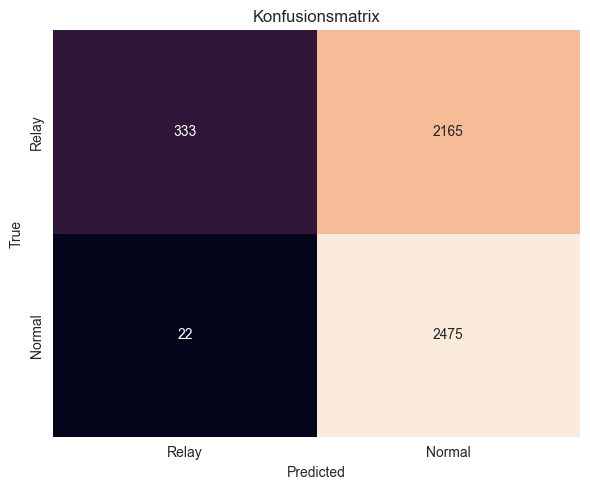

n bins 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.53      0.99      0.69      2497
       Relay       0.93      0.13      0.23      2498

    accuracy                           0.56      4995
   macro avg       0.73      0.56      0.46      4995
weighted avg       0.73      0.56      0.46      4995



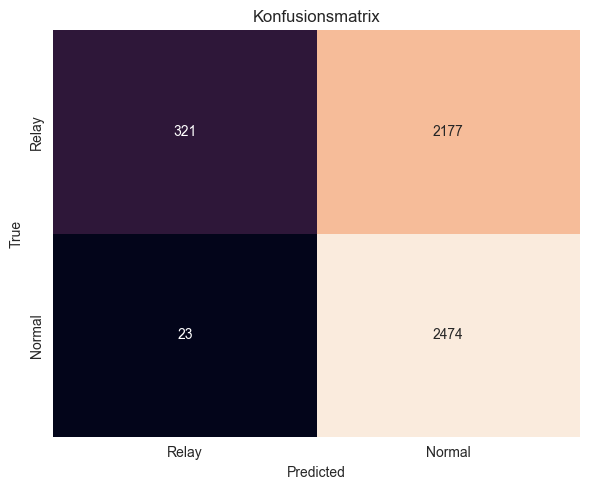

n bins 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.93      0.14      0.25      2498

    accuracy                           0.57      4995
   macro avg       0.73      0.57      0.47      4995
weighted avg       0.73      0.57      0.47      4995



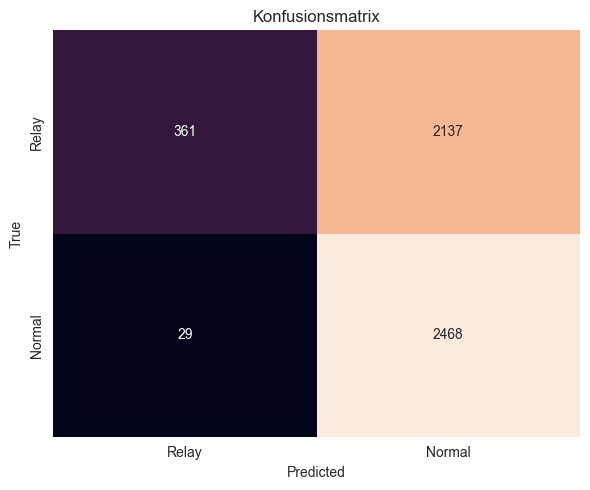

In [7]:
for n in {30,50,100}:
    clf = HBOS(contamination=0.01, n_bins=n)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"n bins {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

n bins 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.93      0.17      0.29      2498

    accuracy                           0.58      4995
   macro avg       0.74      0.58      0.49      4995
weighted avg       0.74      0.58      0.49      4995



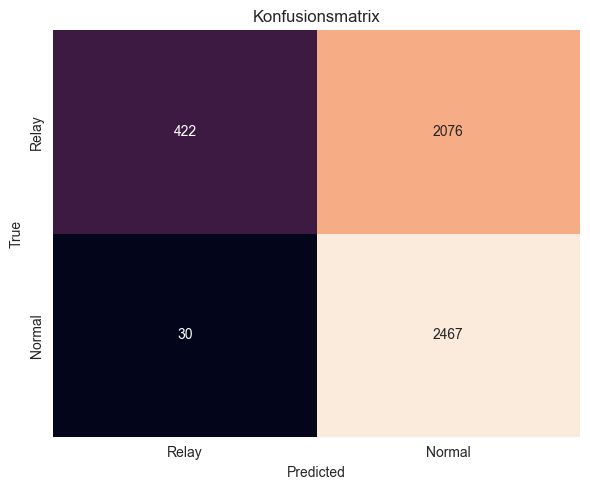

n bins 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.93      0.15      0.25      2498

    accuracy                           0.57      4995
   macro avg       0.73      0.57      0.47      4995
weighted avg       0.73      0.57      0.47      4995



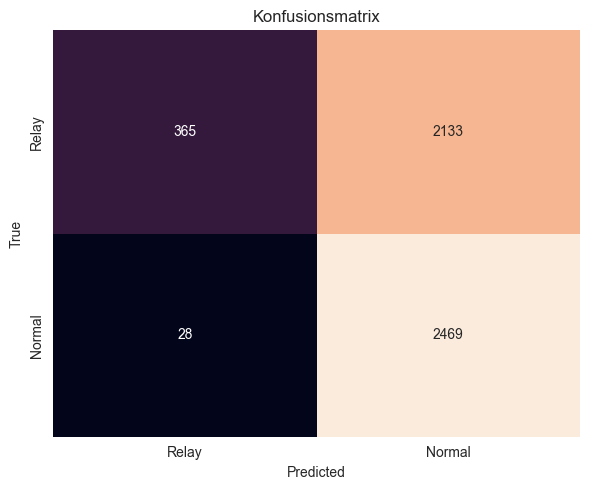

n bins 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.93      0.16      0.28      2498

    accuracy                           0.57      4995
   macro avg       0.74      0.57      0.49      4995
weighted avg       0.74      0.57      0.49      4995



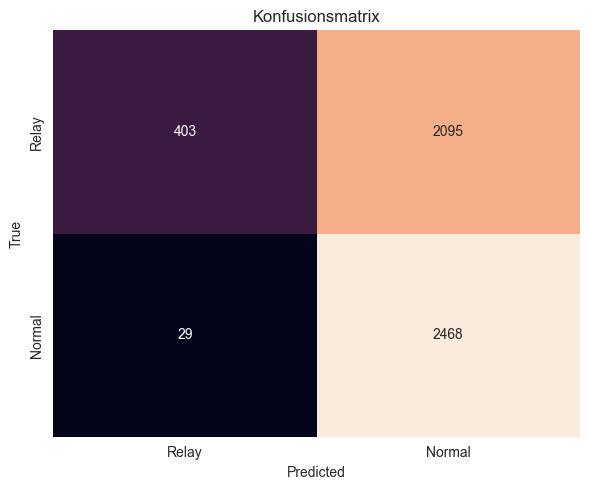

n bins 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.93      0.17      0.29      2498

    accuracy                           0.58      4995
   macro avg       0.74      0.58      0.50      4995
weighted avg       0.74      0.58      0.50      4995



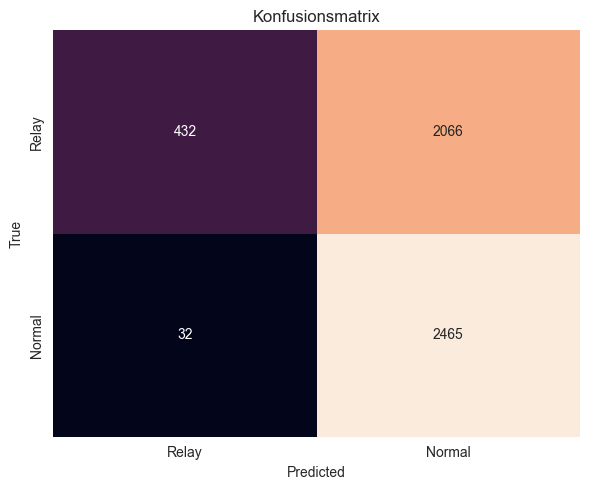

In [5]:
for n in {3,5,10,30}:
    clf = HBOS(contamination=0.01, n_bins=n)
    clf.fit(X_train_scaled_standard)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_standard)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"n bins {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

n bins 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.94      0.19      0.31      2498

    accuracy                           0.59      4995
   macro avg       0.75      0.59      0.51      4995
weighted avg       0.75      0.59      0.51      4995



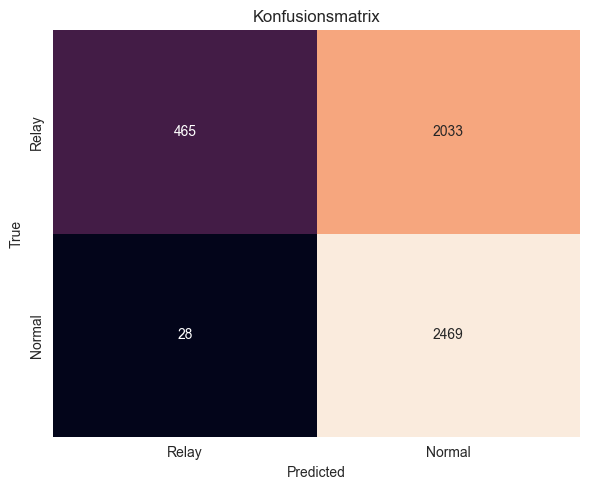

n bins 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.93      0.16      0.27      2498

    accuracy                           0.57      4995
   macro avg       0.73      0.57      0.48      4995
weighted avg       0.73      0.57      0.48      4995



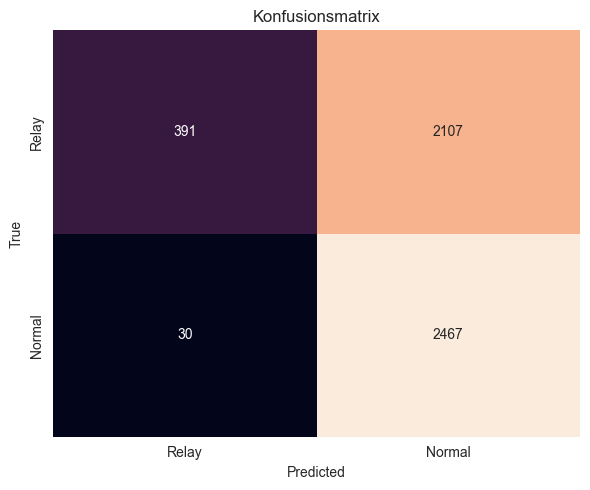

n bins 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2497
       Relay       0.94      0.17      0.28      2498

    accuracy                           0.58      4995
   macro avg       0.74      0.58      0.49      4995
weighted avg       0.74      0.58      0.49      4995



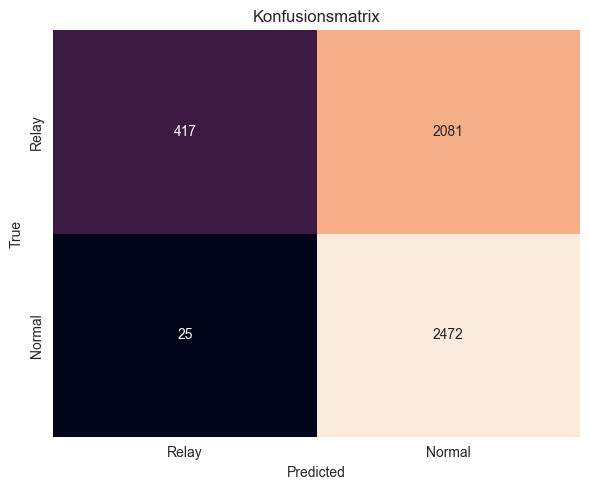

n bins 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.95      0.19      0.32      2498

    accuracy                           0.59      4995
   macro avg       0.75      0.59      0.51      4995
weighted avg       0.75      0.59      0.51      4995



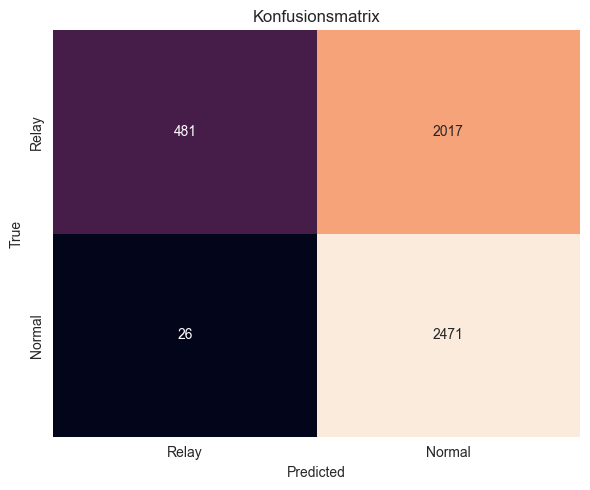

In [6]:
for n in {3,5,10,30}:
    clf = HBOS(contamination=0.01, n_bins=n)
    clf.fit(X_train_scaled_minmax)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_minmax)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"n bins {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()